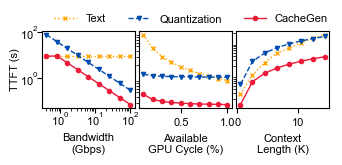

In [11]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.axisartist.axislines import SubplotZero
import json
from io import StringIO
import pandas as pd
import matplotlib.patches as mpatches

fontsize = 8
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = fontsize
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['lines.linewidth']=1
plt.rcParams['lines.markersize']=3

CYAN_LINE = "#00cccc"
CYAN = "cyan"
ORANGE_LINE = "#F2AA3C"
ORANGE = "orange"
GREEN = "#0BEF48"
BLUE = "blue"
PURPLE = "#B682F8"
colors = [
    '#004DAF',
    '#ED1B3A',
    '#FF9900',
    '#33A02C',
    '#FABEAF',
    '#AAD59B',
    '#FC5A50',
    "#008080",
    "#0000FF",
    "#808000",
    "#800080"
]
SYS_COLOR = colors[1]
WORSE_BASELINE_COLOR = colors[0]
BETTER_BASELINE_COLOR = colors[0]

fig, axes = plt.subplots(1, 3, figsize=(3.7, 1))
fig.subplots_adjust(wspace=0.05)
color = ["orange", WORSE_BASELINE_COLOR, SYS_COLOR]
style = ["x:", "v--", "o-"]

ax = axes[2]
context_len = pd.read_csv("context_len.csv", index_col=0, header=0)
context_len.plot(ax=ax, color=color, style=style)
ax.set_yscale("log")
ax.set_yticks([], [])
ax.legend(loc="upper right", bbox_to_anchor=[1.1, 1.35], frameon=False, ncols=3)
ax.set_xlabel("Context\nLength (K)")

ax = axes[1]
context_len = pd.read_csv("gpu.csv", index_col=0, header=0)
context_len.plot(ax=ax, color=color, style=style, legend=None)
ax.set_yscale("log")
ax.set_yticks([], [])
ax.set_xlabel("Available\nGPU Cycle (%)")

ax = axes[0]
context_len = pd.read_csv("throughput.csv", index_col=0, header=0)
context_len.plot(ax=ax, color=color, style=style, legend=None)
ax.set_ylabel("TTFT (s)", labelpad=0)
# ax.set_yticks([])
ax.set_yscale("log")
ax.set_xscale("log")
ax.tick_params(axis="x", which="both", pad=-2)
ax.tick_params(axis="y", which="both", pad=-1)
ax.set_xlabel("Bandwidth\n(Gbps)")

fig.savefig("fig-sens.pdf", bbox_inches="tight", transparent=True)